In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
housing = pd.read_csv("~/Documents/NYCDSA/Third Project/ML_Ames_Housing/data/Ames_Housing_Price_Data.csv", index_col=0)
housing.head() #OPEN DATA FRAME
pd.set_option('display.max_columns', 500)
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [2]:
#Create seperate numeric-set
housing_numeric = housing[['GrLivArea','SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                         '2ndFlrSF','LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',  'GarageCars',
                           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                           '3SsnPorch','ScreenPorch','PoolArea','MiscVal', "YrSold",'GarageYrBlt','MoSold','YearBuilt', 'YearRemodAdd']].copy()
#housing_numeric['PID'] = housing_numeric['PID'].astype('str')
#housing_numeric['YrSold'] = pd.to_datetime(housing_numeric['YrSold']).dt.strftime('%Y')
#housing_numeric['GarageYrBlt'] = pd.to_datetime(housing_numeric['GarageYrBlt']).dt.strftime('%Y')
#housing_numeric['YearBuilt'] = pd.to_datetime(housing_numeric['YearBuilt']).dt.strftime('%Y')
#housing_numeric['YearRemodAdd'] = pd.to_datetime(housing_numeric['YearRemodAdd']).dt.strftime('%Y')
#housing_numeric['MoSold'] = pd.to_datetime(housing_numeric['MoSold'],format='%m').dt.strftime('%m')
#housing_numeric['GarageYrBlt'] = housing_numeric['GarageYrBlt'].fillna('1970') #903426160 and 910201180 do have a garage built, but an NA for all others, filled with mode
housing_numeric.fillna(housing_numeric.mean(), inplace=True)
years = housing_numeric[["YrSold",'GarageYrBlt','MoSold','YearBuilt', 'YearRemodAdd']].copy()
housing_numeric.to_pickle('housing_numeric.pkl')
housing_numeric

,GrLivArea,SalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,GarageYrBlt,MoSold,YearBuilt,YearRemodAdd
1,856,126000,68.516053,7890,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,2.0,399.0,0,0,0,0,166,0,0,2010,1939.0,3,1939,1950
2,1049,139500,42.000000,4235,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1.0,266.0,0,105,0,0,0,0,0,2009,1984.0,2,1984,1984
3,1001,124900,60.000000,6060,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1.0,216.0,154,0,42,86,0,0,0,2007,1930.0,11,1930,2007
4,1039,114000,80.000000,8146,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1.0,281.0,0,0,168,0,111,0,0,2009,1940.0,5,1900,2003
5,1665,227000,70.000000,8400,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2.0,528.0,0,45,0,0,0,0,0,2009,2001.0,11,2001,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,121000,68.516053,8854,0.0,0.0,0.0,952.0,952.0,952,0,0,0.0,0.0,1,0,2,1,4,1,1.0,192.0,0,98,0,0,40,0,0,2009,1916.0,5,1916,1950
760,1733,139600,68.516053,13680,0.0,0.0,0.0,0.0,0.0,1733,0,0,0.0,0.0,2,0,4,1,8,1,2.0,452.0,0,0,0,0,0,0,0,2009,1955.0,6,1955,1955
761,2002,145000,82.000000,6270,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,0.0,0.0,2,0,4,2,8,0,3.0,871.0,0,0,0,0,0,0,0,2007,1949.0,8,1949,1950
762,1842,217500,68.516053,8826,144.0,841.0,0.0,144.0,985.0,985,857,0,1.0,0.0,2,1,3,1,7,1,2.0,486.0,193,96,0,0,0,0,0,2007,2000.0,7,2000,2000


In [3]:
#Create seperate factor-set
housing_factor = housing.drop(['GrLivArea','SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                         '2ndFlrSF','LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',  'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal', "YrSold",'GarageYrBlt','MoSold','YearBuilt', 'YearRemodAdd'], axis=1)
housing_factor['PavedDrive'] = housing_factor.PavedDrive.apply(lambda Paved: 1 if Paved != "N" else 0)
housing_factor['CentralAir'] = housing_factor.CentralAir.apply(lambda Central: 1 if Central != "N" else 0) #Convert Y/N to Booleon 
housing_factor[['PID','MSSubClass','OverallQual','OverallCond']] = housing_factor[['PID','MSSubClass','OverallQual','OverallCond']].astype(str)
housing_factor[['PavedDrive','CentralAir']] = housing_factor[['PavedDrive','CentralAir']].astype('bool')
housing_factor #transform all integers into categorical variables
housing_factor.dtypes[housing_factor.dtypes == 'int64']
housing_factor

,PID,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,909176150,30,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,True,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,True,NaN,NaN,NaN,WD,Normal
2,905476230,120,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,True,SBrkr,Gd,Typ,NaN,Attchd,Fin,TA,TA,True,NaN,NaN,NaN,WD,Normal
3,911128020,30,C (all),Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,Hip,CompShg,MetalSd,MetalSd,NaN,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,True,SBrkr,Gd,Typ,NaN,Detchd,Unf,TA,Po,False,NaN,NaN,NaN,WD,Normal
4,535377150,70,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,Gable,CompShg,MetalSd,MetalSd,NaN,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,True,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,False,NaN,NaN,NaN,WD,Normal
5,534177230,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,True,SBrkr,Gd,Typ,NaN,Attchd,Fin,TA,TA,True,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,30,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,TA,TA,BrkTil,TA,TA,No,Unf,Unf,Grav,Fa,False,FuseF,Fa,Typ,Gd,Detchd,Unf,Fa,Po,True,NaN,NaN,NaN,WD,Normal
760,905402060,20,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,Hip,CompShg,BrkFace,Wd Sdng,NaN,TA,TA,Slab,NaN,NaN,NaN,NaN,NaN,GasA,Ex,True,FuseA,TA,Min2,Gd,Attchd,Unf,TA,TA,True,NaN,NaN,NaN,WD,Normal
761,909275030,90,RH,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,False,FuseA,TA,Typ,NaN,2Types,Unf,TA,TA,True,NaN,NaN,NaN,WD,Normal
762,907192040,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,True,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,True,NaN,NaN,NaN,WD,Normal


In [4]:
#Get rid of all NAs
housing_factor['MiscFeature'] = housing_factor['MiscFeature'].fillna('NoFeature')
housing_factor['PoolQC'] = housing_factor['PoolQC'].fillna('NoPool')
housing_factor['Fence'] = housing_factor['Fence'].fillna('NoFence')
housing_factor['GarageQual'] = housing_factor['GarageQual'].fillna('NoGarage')
housing_factor['GarageCond'] = housing_factor['GarageCond'].fillna('NoGarage')
housing_factor['GarageFinish'] = housing_factor['GarageFinish'].fillna('NoGarage')
housing_factor['GarageType'] = housing_factor['GarageType'].fillna('NoGarage')
housing_factor['FireplaceQu'] = housing_factor['FireplaceQu'].fillna('NoFireplace')
housing_factor['BsmtFinType2'] = housing_factor['BsmtFinType2'].fillna('NoBsmt') #528142130 has a basement, but NA for values
housing_factor['BsmtFinType1'] = housing_factor['BsmtFinType1'].fillna('NoBsmt')
housing_factor['BsmtExposure'] = housing_factor['BsmtExposure'].fillna('NoBsmt')
housing_factor['BsmtCond'] = housing_factor['BsmtCond'].fillna('NoBsmt')
housing_factor['BsmtQual'] = housing_factor['BsmtQual'].fillna('NoBsmt') #916386080 is missing an electrical value  veneer
housing_factor['MasVnrType'] = housing_factor['MasVnrType'].fillna('NoVeneer')
housing_factor['Alley'] = housing_factor['Alley'].fillna('NoAlley')

housing_factor.to_pickle('housing_factor.pkl')
housing_factor

,PID,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,909176150,30,RL,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Wd Sdng,Wd Sdng,NoVeneer,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,True,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,True,NoPool,NoFence,NoFeature,WD,Normal
2,905476230,120,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,True,SBrkr,Gd,Typ,NoFireplace,Attchd,Fin,TA,TA,True,NoPool,NoFence,NoFeature,WD,Normal
3,911128020,30,C (all),Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,Hip,CompShg,MetalSd,MetalSd,NoVeneer,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,True,SBrkr,Gd,Typ,NoFireplace,Detchd,Unf,TA,Po,False,NoPool,NoFence,NoFeature,WD,Normal
4,535377150,70,RL,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,Gable,CompShg,MetalSd,MetalSd,NoVeneer,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,True,SBrkr,TA,Typ,NoFireplace,Detchd,Unf,TA,TA,False,NoPool,NoFence,NoFeature,WD,Normal
5,534177230,60,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,Gable,CompShg,VinylSd,VinylSd,NoVeneer,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,True,SBrkr,Gd,Typ,NoFireplace,Attchd,Fin,TA,TA,True,NoPool,NoFence,NoFeature,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,30,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,Gable,CompShg,Wd Sdng,Wd Sdng,NoVeneer,TA,TA,BrkTil,TA,TA,No,Unf,Unf,Grav,Fa,False,FuseF,Fa,Typ,Gd,Detchd,Unf,Fa,Po,True,NoPool,NoFence,NoFeature,WD,Normal
760,905402060,20,RL,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,Hip,CompShg,BrkFace,Wd Sdng,NoVeneer,TA,TA,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NoBsmt,GasA,Ex,True,FuseA,TA,Min2,Gd,Attchd,Unf,TA,TA,True,NoPool,NoFence,NoFeature,WD,Normal
761,909275030,90,RH,Pave,NoAlley,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,Gable,CompShg,MetalSd,MetalSd,NoVeneer,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,False,FuseA,TA,Typ,NoFireplace,2Types,Unf,TA,TA,True,NoPool,NoFence,NoFeature,WD,Normal
762,907192040,60,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,True,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,True,NoPool,NoFence,NoFeature,WD,Normal


In [5]:
from sklearn.preprocessing import LabelEncoder
SalePrice = housing['SalePrice'] #This is the target
housing_factor_dummified1 = housing_factor.drop(['PID'], axis=1)
label_encoder = LabelEncoder()
#housing_factor_dummified1[['MSZoning','Street','Alley',
#'LotShape','LandContour',
#'Utilities','LotConfig','LandSlope','Neighborhood',
#'Condition1','Condition2','BldgType','HouseStyle',
#'RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
#'MasVnrType','ExterQual','ExterCond','Foundation',
#'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
#'BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual',
#'Functional','FireplaceQu','GarageType','GarageFinish',
#'GarageQual','GarageCond','PoolQC','Fence','MiscFeature',
#'SaleType','SaleCondition']] = label_encoder.fit_transform(housing_factor_dummified1[['MSZoning','Street','Alley',
#'LotShape','LandContour',
#'Utilities','LotConfig','LandSlope','Neighborhood',
#'Condition1','Condition2','BldgType','HouseStyle',
#'RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
#'MasVnrType','ExterQual','ExterCond','Foundation',
#'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
#'BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual',
#'Functional','FireplaceQu','GarageType','GarageFinish',
#'GarageQual','GarageCond','PoolQC','Fence','MiscFeature',
#'SaleType','SaleCondition']])

housing_factor_dummified1= housing_factor_dummified1.apply(label_encoder.fit_transform)

housing_factor_dummified1 = pd.get_dummies(housing_factor_dummified1, drop_first = True)
housing_factor_dummified1

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,6,5,1,1,3,3,0,0,0,21,2,2,0,2,6,5,1,0,13,14,2,3,4,1,5,5,3,5,6,1,4,1,3,4,6,2,5,3,5,5,1,3,4,1,9,4
2,0,5,1,1,3,3,0,4,0,7,2,2,4,2,5,4,1,0,6,6,1,2,4,1,2,5,2,2,0,1,4,1,3,2,6,3,1,0,5,5,1,3,4,1,9,4
3,6,1,1,1,3,3,0,4,0,11,2,2,0,2,5,8,3,0,8,8,2,2,4,0,5,5,3,0,6,1,0,1,3,2,6,3,5,3,5,4,0,3,4,1,9,4
4,11,5,1,1,3,3,0,0,0,20,2,2,0,5,4,7,1,0,8,8,2,2,2,0,1,5,3,6,6,1,2,1,3,4,6,3,5,3,5,5,0,3,4,1,9,4
5,10,5,1,1,3,3,0,4,0,17,2,2,0,5,8,5,1,0,12,13,2,2,4,2,2,5,3,2,6,1,0,1,3,2,6,3,1,0,5,5,1,3,4,1,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,6,5,1,1,3,3,0,4,0,3,2,2,0,1,6,5,1,0,13,14,2,3,4,0,5,5,3,6,6,3,1,0,1,1,6,2,5,3,1,4,1,3,4,1,9,4
760,5,5,1,1,0,3,0,1,0,7,2,2,0,2,3,4,3,0,3,14,2,3,4,3,3,3,4,4,4,1,0,1,0,4,3,2,1,3,5,5,1,3,4,1,9,4
761,15,4,1,1,3,1,0,4,0,6,2,2,2,5,5,5,1,0,8,8,2,3,4,1,5,5,3,1,6,1,4,0,0,4,6,3,0,3,5,5,1,3,4,1,9,4
762,10,5,1,1,3,3,0,4,0,5,2,2,0,5,7,4,1,0,12,13,1,2,4,2,2,5,3,2,6,1,0,1,3,2,6,5,1,0,5,5,1,3,4,1,9,4


In [6]:
pd.set_option('display.max_rows', 500)
#housing_numeric = pd.concat([housing_numeric, years], axis=1)
housing_numeric.to_pickle('housing_numeric.pkl')
housing_factor_dummified1 = pd.concat([housing_numeric, housing_factor_dummified1], axis=1)
#housing_factor_dummified1 = pd.concat([housing_factor_dummified1,housing_factor[["YrSold",'GarageYrBlt','MoSold','PavedDrive','YearBuilt', 'YearRemodAdd', 'CentralAir']]], axis = 1)
housing_factor_dummified1 = housing_factor_dummified1.drop(['SalePrice'], axis=1)

In [7]:
from sklearn.linear_model import LinearRegression
#housing_factor_dummified1 = housing_factor_dummified1.drop(['PID'], axis=1)
lm = LinearRegression()
lm.fit(housing_factor_dummified1, housing['SalePrice'])

LinearRegression()

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 7.100e+01,
        2.126e+03, 3.610e+02, 1.400e+01, 6.000e+00]),
 array([-409735.45392211, -348518.7805513 , -287302.1071805 ,
        -226085.4338097 , -164868.76043889, -103652.08706809,
         -42435.41369729,   18781.25967351,   79997.93304432,
         141214.60641512,  202431.27978592]),
 <BarContainer object of 10 artists>)

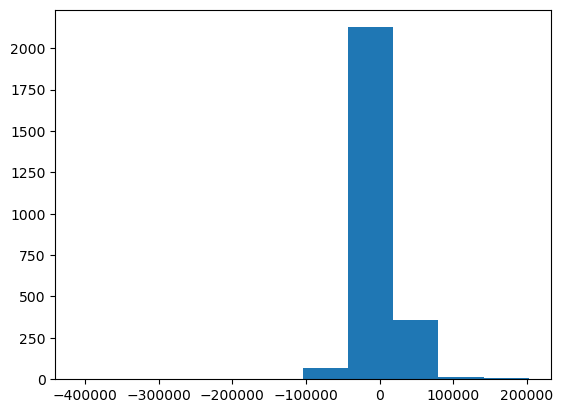

In [8]:
import matplotlib.pyplot as plt
residuals = SalePrice - lm.predict(housing_factor_dummified1)
plt.hist(residuals)

In [9]:
print('R^2 is equal to %.3f' %(lm.score(housing_factor_dummified1,SalePrice))) #By default, score gives R^2. 
print('RSS is equal to %.3f' %(np.sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.887
RSS is equal to 1640120835476.257
The intercept is 705143.934
The slopes are [ 3.77004876e+01  5.23138939e+01  4.79107987e-01  3.79449252e+01
  1.80212636e+01  5.98065442e+00 -2.34523070e+00  2.16566873e+01
  2.45651400e+01  2.11365020e+01 -8.00115445e+00  2.42859615e+03
 -5.79403462e+02 -1.27972530e+03  4.54760340e+02 -7.42228216e+03
 -1.87361280e+04  2.48308740e+03  6.79043582e+03  3.06297046e+03
  2.18889721e+01  1.16107581e+01 -7.32288388e+00  2.43905617e+01
  3.60207038e-01  4.37516547e+01 -4.45132012e+01  7.85494066e-04
 -7.51989715e+02  1.12936443e+01 -2.18892187e+02  3.62473495e+02
  7.36805548e+01  6.56443159e+01 -8.61281450e+02  2.18358019e+04
  1.45370398e+03 -7.84621598e+02 -1.13660729e+03 -4.15259305e+03
  3.70155265e+02 -6.63133835e+02  1.53400102e+02 -2.19475262e+02
 -5.24629735e+03 -2.98212111e+03 -6.87567917e+02  1.86952859e+03
  6.75352862e+03  1.65139430e+03  2.59663843e+03 -8.11745263e+02
  7.30218372e+02  4.56544374e+03 -1.43322229e+04  2.0644

In [10]:
print('negative slope column names %s' %(housing_factor_dummified1.columns[lm.coef_ < 0]))
print('positive slope column names %s' %(housing_factor_dummified1.columns[lm.coef_ > 0]))

negative slope column names Index(['BsmtUnfSF', 'LowQualFinSF', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'OpenPorchSF', 'PoolArea', 'YrSold', 'MoSold',
       'MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LandSlope',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'Exterior1st',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType2', 'HeatingQC',
       'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
       'GarageQual', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')
positive slope column names Index(['GrLivArea', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'MSSubClass', 'Street',
       'Alley', 'LotConfig', 'Nei

(array([   2.,    0.,    0.,    4.,    3.,   44., 1044., 1386.,   89.,
           8.]),
 array([-1.48988122, -1.27916357, -1.06844591, -0.85772826, -0.6470106 ,
        -0.43629295, -0.22557529, -0.01485764,  0.19586002,  0.40657767,
         0.61729533]),
 <BarContainer object of 10 artists>)

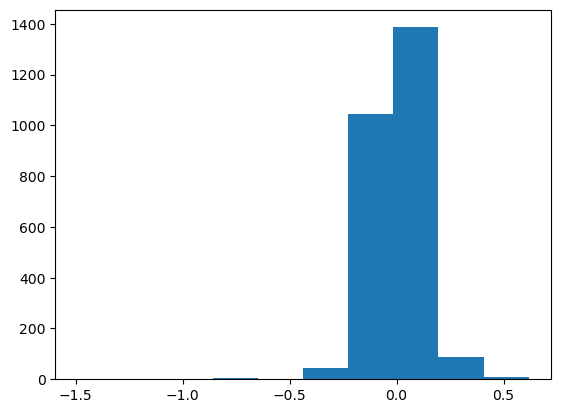

In [11]:
log_SalePrice = np.log(SalePrice) #Take log of DV
lm.fit(housing_factor_dummified1, log_SalePrice) #LM of log of DV
residuals = log_SalePrice - lm.predict(housing_factor_dummified1)
plt.hist(residuals)

In [12]:
print('R^2 is equal to %.3f' %(lm.score(housing_factor_dummified1,log_SalePrice))) #By default, score gives R^2. 
print('RSS is equal to %.3f' %(np.sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.909
RSS is equal to 35.315
The intercept is 14.418
The slopes are [ 1.73710615e-04  4.28054993e-04  2.13522986e-06  3.89876089e-05
  6.42629333e-05  3.95998404e-05 -1.12582445e-07  1.03750191e-04
  1.23084673e-04  8.83325432e-05 -3.77066015e-05  2.47485838e-02
  5.86289834e-03  1.52703220e-02  9.83069018e-03 -2.00503445e-02
 -8.23095056e-02  1.10670322e-02  3.46341700e-02  3.00415136e-02
  4.54786906e-05  3.79746260e-05 -2.76608591e-06  1.87427945e-04
  7.45745700e-05  2.54640079e-04 -1.49699671e-04  1.17822974e-06
 -4.69256359e-03  2.44495228e-04 -1.08650406e-03  1.96018561e-03
  6.73172676e-04  2.94893558e-03 -1.24915378e-02  1.28397151e-01
  1.82073540e-02 -4.82119427e-03 -3.50585221e-03 -6.34949521e-02
  1.36498602e-03  8.61959799e-03  1.01929302e-04  4.98999384e-04
 -3.00257738e-02 -7.14522831e-03 -4.06383276e-03  3.75818633e-02
  4.91385520e-02  2.98193236e-03  8.87639824e-03 -2.58781410e-03
  4.32024880e-03  9.25097956e-03 -3.54671353e-02  1.43653631e-02
  6.54

In [13]:
scores = {}
for idx, name1 in enumerate(housing_factor_dummified1.columns):
        myColumns = housing_factor_dummified1.columns[(idx+1):]
        pass

In [14]:
from itertools import combinations 

scores = {}

combos = combinations(housing_factor_dummified1.columns, 3)

for c in combos:
    X = housing_factor_dummified1[list(c)]
    Y = log_SalePrice
    reg = LinearRegression().fit(X,Y)
    scores[c] = reg.score (X,Y)

In [15]:
sorted(scores.items(), key=lambda features_score: abs(features_score [1]), reverse = True)

[(('GrLivArea', 'TotalBsmtSF', 'YearBuilt'), 0.7714551451333254),
 (('GrLivArea', 'YearBuilt', 'OverallQual'), 0.7604729424467696),
 (('GrLivArea', 'YearBuilt', 'OverallCond'), 0.7586200588631286),
 (('GrLivArea', 'TotalBsmtSF', 'OverallQual'), 0.7579387156580107),
 (('GrLivArea', 'BsmtFinSF1', 'YearBuilt'), 0.7560063000859526),
 (('GrLivArea', 'BsmtFinSF1', 'OverallQual'), 0.7555270792257379),
 (('1stFlrSF', '2ndFlrSF', 'YearBuilt'), 0.7505689977295026),
 (('GrLivArea', '1stFlrSF', 'YearBuilt'), 0.7502545592276775),
 (('GrLivArea', 'TotalBsmtSF', 'YearRemodAdd'), 0.749848485569653),
 (('GrLivArea', '2ndFlrSF', 'YearBuilt'), 0.7481493441965616),
 (('GrLivArea', 'GarageArea', 'YearBuilt'), 0.7444299703937638),
 (('GrLivArea', 'GarageCars', 'YearBuilt'), 0.7403132563307049),
 (('GrLivArea', 'Fireplaces', 'YearBuilt'), 0.7388960359402381),
 (('GrLivArea', 'YearBuilt', 'KitchenQual'), 0.7382692175027734),
 (('GrLivArea', 'BsmtFullBath', 'YearBuilt'), 0.7376513780196292),
 (('GrLivArea', 'G

In [16]:
import statsmodels.api as sm
x = sm.add_constant(housing_factor_dummified1)
model = sm.OLS(log_SalePrice, x.astype(float))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     323.5
Date:                Sat, 15 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:06:35   Log-Likelihood:                 1874.8
No. Observations:                2580   AIC:                            -3594.
Df Residuals:                    2502   BIC:                            -3137.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.4179      3.715      3.881      0.000       7.132      21.704
GrLivArea         0.0002   1.63e-05     10.659      0.000       0.000       0.000
LotFrontage       0.0004      0.000      2.816      0.005       0.000       0.001
LotArea        2.135e-06   3.57e-07      5.978      0.000    1.43e-06    2.84e-06
MasVnrArea     3.899e-05   1.76e-05      2.213      0.027    4.44e-06    7.35e-05
BsmtFinSF1     6.426e-05   8.18e-06      7.853      0.000    4.82e-05    8.03e-05
BsmtFinSF2      3.96e-05   1.51e-05      2.615      0.009     9.9e-06    6.93e-05
BsmtUnfSF     -1.126e-07   7.79e-06     -0.014      0.988   -1.54e-05    1.52e-05
TotalBsmtSF       0.0001   9.37e-06     11.072      0.000    8.54e-05       0.000
1stFlrSF          0.0001   1.68e-05      7.322      0.000    9.01e-05       0.000
2ndFlrSF       8.833e-05   1.56e-05      5.651      0.000    5.77e-05       0.000
LowQualFinSF  -3.771e-05   4.17e-05     -0.904      0.366      -0.000     4.4e-05
BsmtFullBath      0.0247      0.007      3.689      0.000       0.012       0.038
BsmtHalfBath      0.0059      0.011      0.553      0.580      -0.015       0.027
FullBath          0.0153      0.007      2.058      0.040       0.001       0.030
HalfBath          0.0098      0.007      1.368      0.171      -0.004       0.024
BedroomAbvGr     -0.0201      0.005     -4.277      0.000      -0.029      -0.011
KitchenAbvGr     -0.0823      0.016     -4.989      0.000      -0.115      -0.050
TotRmsAbvGrd      0.0111      0.003      3.350      0.001       0.005       0.018
Fireplaces        0.0346      0.005      7.441      0.000       0.026       0.044
GarageCars        0.0300      0.008      3.841      0.000       0.015       0.045
GarageArea     4.548e-05   2.76e-05      1.651      0.099   -8.55e-06    9.95e-05
WoodDeckSF     3.797e-05   2.06e-05      1.839      0.066   -2.51e-06    7.85e-05
OpenPorchSF   -2.766e-06   3.97e-05     -0.070      0.944   -8.06e-05    7.51e-05
EnclosedPorch     0.0002   4.08e-05      4.597      0.000       0.000       0.000
3SsnPorch      7.457e-05   9.39e-05      0.794      0.427      -0.000       0.000
ScreenPorch       0.0003   4.37e-05      5.828      0.000       0.000       0.000
PoolArea         -0.0001   8.79e-05     -1.703      0.089      -0.000    2.27e-05
MiscVal        1.178e-06   4.91e-06      0.240      0.810   -8.45e-06    1.08e-05
YrSold           -0.0047      0.002     -2.547      0.011      -0.008      -0.001
GarageYrBlt       0.0002      0.000      1.278      0.202      -0.000       0.001
MoSold           -0.0011      0.001     -1.205      0.228      -0.003       0.001
YearBuilt         0.0020      0.000      9.039      0.000       0.002       0.002
YearRemodAdd      0.0007      0.000      3.616      0.000       0.000       0.001
MSSubClass        0.0029      0.001      2.543   

In [17]:
pValues = results.pvalues
print('The significant coefficients')
pValues[pValues < .05].sort_values()

The significant coefficients


OverallCond      5.321098e-62
OverallQual      1.772705e-51
TotalBsmtSF      7.504272e-28
GrLivArea        5.649917e-26
YearBuilt        3.077108e-19
SaleCondition    6.186082e-19
BsmtFinSF1       5.993099e-15
Fireplaces       1.361580e-13
1stFlrSF         3.270336e-13
Functional       3.939083e-12
ExterQual        1.253207e-10
CentralAir       1.570432e-09
LotArea          2.581841e-09
ScreenPorch      6.320603e-09
2ndFlrSF         1.770946e-08
KitchenAbvGr     6.475868e-07
PavedDrive       1.599109e-06
EnclosedPorch    4.495701e-06
HeatingQC        8.556424e-06
GarageCond       1.031048e-05
KitchenQual      1.059962e-05
ExterCond        1.649634e-05
BedroomAbvGr     1.965074e-05
const            1.069183e-04
GarageCars       1.254324e-04
MSZoning         2.224002e-04
BsmtFullBath     2.295378e-04
BsmtExposure     2.488707e-04
YearRemodAdd     3.054915e-04
TotRmsAbvGrd     8.191396e-04
Exterior2nd      1.232505e-03
Street           1.550811e-03
LotFrontage      4.897234e-03
Condition2

In [21]:
print('The insignificant coefficients')
pValues[pValues > .05].sort_values(ascending=False)

The insignificant coefficients


BsmtUnfSF       0.988478
OpenPorchSF     0.944456
Condition1      0.862291
BsmtFinType2    0.836090
SaleType        0.813722
MiscVal         0.810322
Neighborhood    0.781728
BsmtCond        0.731701
Fence           0.654655
Electrical      0.612990
BsmtHalfBath    0.580295
Utilities       0.471880
LandSlope       0.458453
3SsnPorch       0.427188
GarageQual      0.393263
LotConfig       0.378711
LandContour     0.372921
LowQualFinSF    0.365857
RoofStyle       0.357785
MoSold          0.228199
GarageYrBlt     0.201522
GarageFinish    0.179811
HalfBath        0.171371
GarageType      0.168582
Foundation      0.155015
Heating         0.119663
BsmtFinType1    0.112230
MiscFeature     0.104077
GarageArea      0.098933
PoolArea        0.088707
Exterior1st     0.080238
Alley           0.079807
WoodDeckSF      0.065995
FireplaceQu     0.053153
RoofMatl        0.053090
dtype: float64